# Insper - Ciência dos Dados 2022.2

## Engenharia - 2ºB

### Integrantes do grupo:

* Beatriz Rodrigues de Freitas

* Carlos Eduardo Porciuncula Yamada

* Verônica Luisa Ribeiro Lima

___
<div id='sumario'></div>

## Sumário

1. [Introdução](#intro)

2. [Minerando Dados e Características do Dataset](#data-mining)

3. [Modelos de Predição](#prediction)

4. [Processo e Estatísticas de Validação](#validation)

5. [Conclusão](#conclusion)

6. [Referências Bibliográficas](#ref)

___
<div id='intro'></div>

## 1. Introdução

### Objetivo

O objetivo deste projeto é criar um código capaz de prever o preço de um notebook (em euros) a partir de algumas features fornescidas pela base de dados "Laptop_price", disponibilizada na plataforma Kaggle por MUHAMMET VARLI em 2020. 
Os dados utilizados para a modelagem da target estão descritos a seguir:


### Descrição da base de dados

* `Company`: **object** → Fabricante do computador;

* `TypeName`: **object** → Tipo do uso;

* `Inches`: **float** → Tamanho (em polegadas);

* `Cpu`: **object** → Qual o processador;

* `Ram`: **object** → Quantidade de memória Ram;

* `Memory`: **object** → Quantidade de memória Rom, assim como o seu tipo;

* `Product`: **object** → Modelo do notebook;

* `ScreenResolution`: **object** → Resolução da tela;

* `OpSys`: **object** → Sistema operacional.


As bibliotecas utilizadas na contrução do robô serão as seguintes:

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import os
import re 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error


In [3]:
celular = pd.read_csv('dados/celular_train.csv', sep=',',  encoding='latin-1')
celular.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


___
<div id='data-mining'></div>

## 2. Minerando Dados e Características do Dataset




In [4]:
dados = celular.loc[:, ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep'	,'mobile_wt','n_cores',	'px_height','px_width','ram','sc_h'	,'sc_w','talk_time','three_g','touch_screen','wifi', 'price_range']]

dados.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,1263,1716,2603,11,2,9,1,1,0,2


In [6]:
dados.shape

(2000, 20)

[Voltar para o sumário](#sumario)


## 2.1 Análise exploratória


### 2.1 Disposição dos preços

Entendendo como o preço varia na base de dados

In [7]:
dados['price_range'].describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

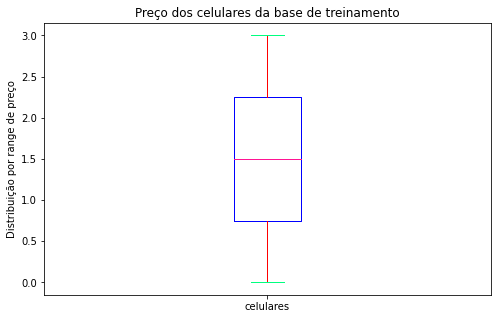

In [8]:
plt.figure(figsize=(8,5))

plt.subplot(111)
plt.boxplot(dados['price_range'], labels = ['celulares'],  
            boxprops=dict(color='blue'),
            medianprops=dict(color='deeppink'),
            capprops=dict(color='springgreen'),
            whiskerprops=dict(color='red'),
            flierprops=dict(color='yellow', markeredgecolor='cyan')
            )
plt.title('Preço dos celulares da base de treinamento')
plt.ylabel('Distribuição por range de preço')

plt.show()

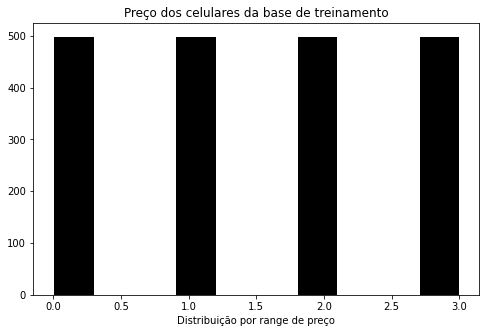

In [9]:
plt.figure(figsize=(8,5))

plt.subplot(111)
plt.hist(dados['price_range'], edgecolor='white', color='k')
plt.xlabel('Distribuição por range de preço')
plt.title("Preço dos celulares da base de treinamento")
plt.show()

### 2.2 Comparação das variáveis

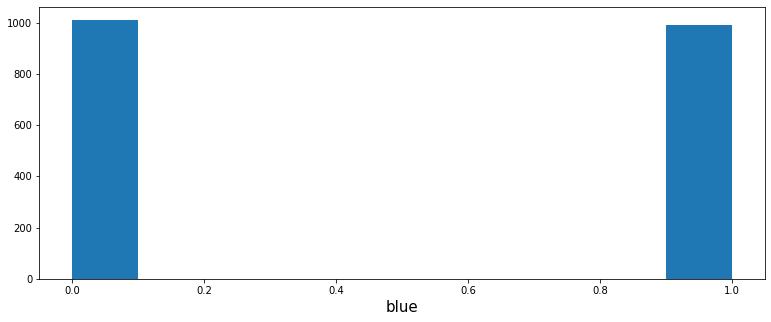

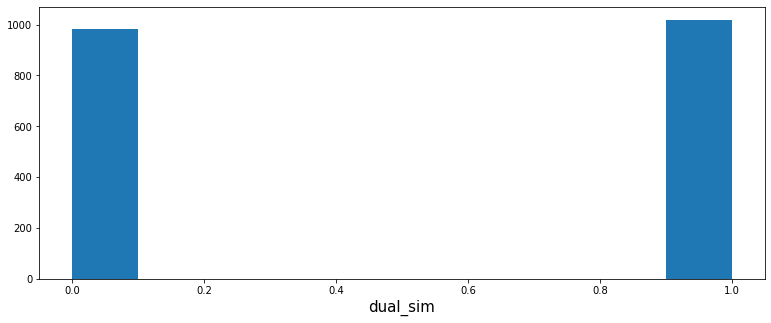

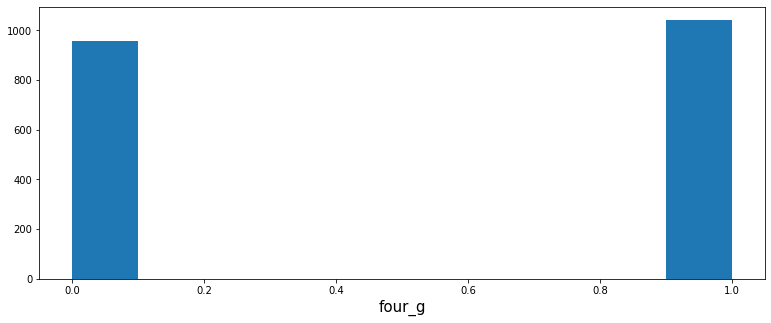

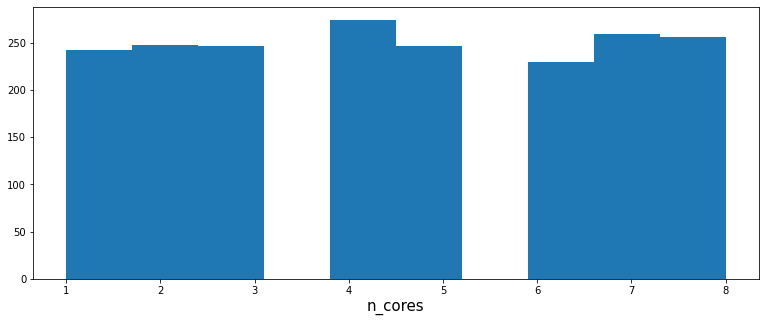

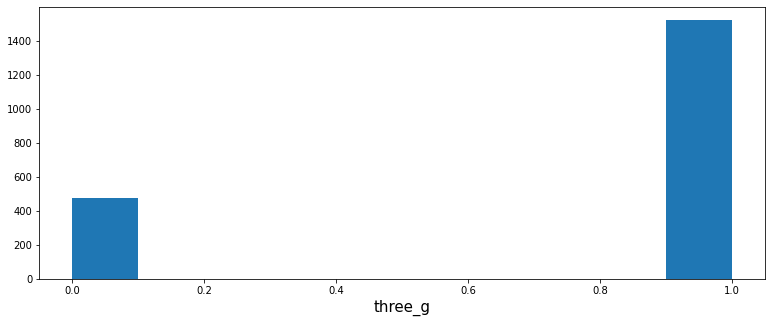

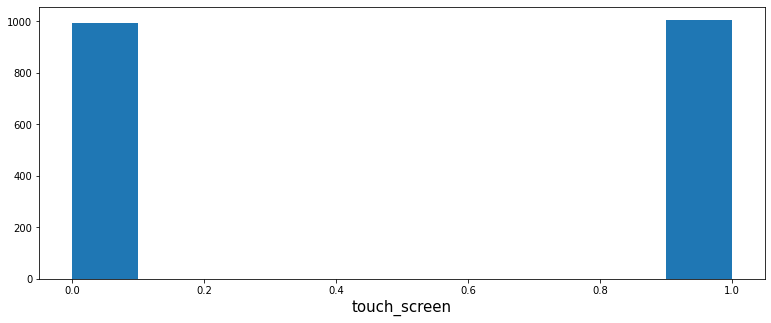

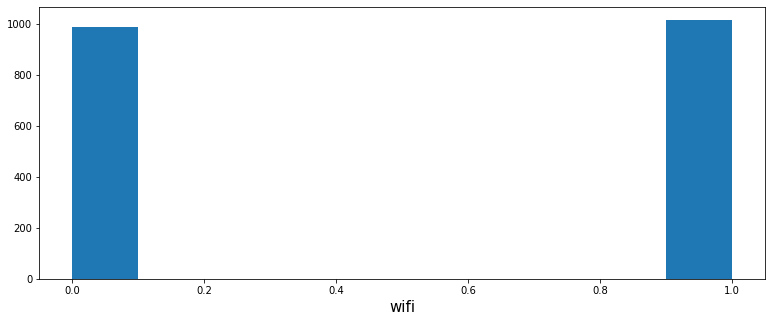

In [10]:
Categorical = ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']
i = 0
while i<7:
    fig = plt.figure(figsize = [13,5])
    plt.subplot(111)    
    a = Categorical[i]                  
    plt.hist(dados[a])

    plt.xlabel(Categorical[i],fontsize=15)
    i += 1
    

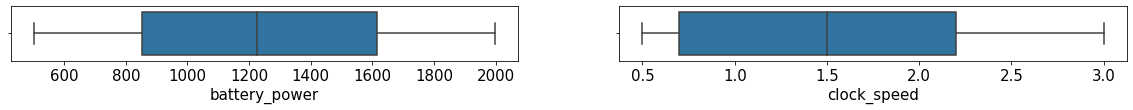

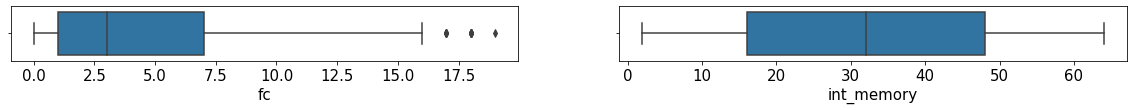

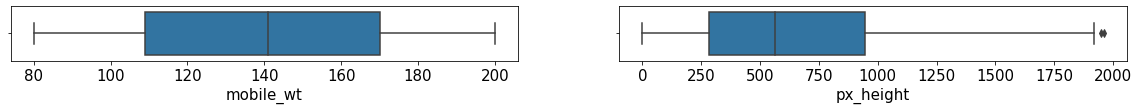

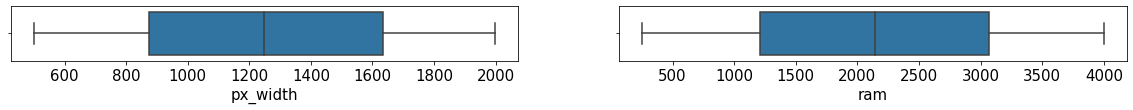

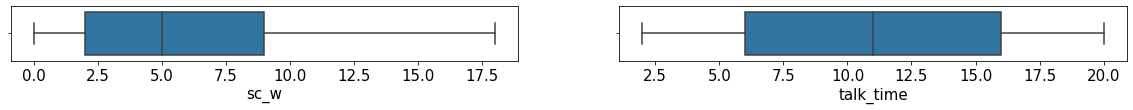

In [11]:
Numerical = ['battery_power','clock_speed','fc','int_memory','mobile_wt','px_height','px_width','ram','sc_w','talk_time']
         
i = 0
while i<10:
    fig = plt.figure(figsize = [20,1])
    plt.subplot(1,2,1)   
    sns.boxplot(x = Numerical[i], data=dados) 
    plt.xticks(fontsize=15)
    plt.xlabel(Numerical[i],fontsize=15)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x = Numerical[i], data=dados) 
    plt.xticks(fontsize=15)
    plt.xlabel(Numerical[i],fontsize=15)
    i += 1
    plt.show()

[Voltar para o sumário](#sumario)

___
<div id='prediction'></div>

## 3. Modelos de Predição

Descrever e justificar pelo menos **DUAS** técnicas de predição.

### Criando base de teste e treinamento 

A base da dados deve ser seraparada entre uma parte qual será responsável por ensinar o algoritmo a fazer as predições, e em outra na qual o robô será testato, para verificar sua eficiência. 

In [12]:
features = ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep'	,'mobile_wt','n_cores',	'px_height','px_width','ram','sc_h'	,'sc_w','talk_time','three_g','touch_screen','wifi']
X = dados.loc[:, features]
y = dados.loc[:, ['price_range']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .60)

X_train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
891,1652,0,0.6,1,4,1,40,1.0,198,7,352,1084,3592,7,6,6,1,0,0
1796,793,1,2.8,1,1,1,64,0.4,179,4,818,1006,2296,12,0,5,1,1,0
1868,1766,1,0.5,1,1,1,22,0.8,122,8,291,1318,3297,7,5,16,1,0,0


In [13]:
X_test.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
405,1454,1,0.5,1,1,0,34,0.7,83,4,250,1033,3419,7,5,5,1,1,0
1190,1092,1,0.5,1,10,0,11,0.5,167,3,468,571,737,14,4,11,0,1,0
1132,1524,1,1.8,1,0,0,10,0.6,174,4,154,550,2678,16,5,13,1,0,1


### Método de Regressão Múltipla

método de remoção de variáveis do modelo: Backward Stepwise

In [35]:
import statsmodels.api as sm

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

results = regress(y, X)
display(results.pvalues)

const            2.590922e-126
battery_power    4.408222e-173
blue              8.868130e-01
clock_speed       1.710964e-01
dual_sim          1.003315e-01
fc                5.257839e-01
four_g            9.344112e-01
int_memory        2.957375e-02
m_dep             6.915261e-01
mobile_wt         1.525848e-05
n_cores           5.622497e-01
px_height         4.080082e-46
px_width          4.849815e-45
ram               0.000000e+00
sc_h              5.629491e-01
sc_w              8.615421e-01
talk_time         7.811608e-01
three_g           1.935261e-01
touch_screen      6.915227e-01
wifi              1.364135e-01
dtype: float64

In [36]:
X1 = X.drop('four_g', axis='columns')
results1 = regress(y, X1)
display(results.pvalues)

const            2.590922e-126
battery_power    4.408222e-173
blue              8.868130e-01
clock_speed       1.710964e-01
dual_sim          1.003315e-01
fc                5.257839e-01
four_g            9.344112e-01
int_memory        2.957375e-02
m_dep             6.915261e-01
mobile_wt         1.525848e-05
n_cores           5.622497e-01
px_height         4.080082e-46
px_width          4.849815e-45
ram               0.000000e+00
sc_h              5.629491e-01
sc_w              8.615421e-01
talk_time         7.811608e-01
three_g           1.935261e-01
touch_screen      6.915227e-01
wifi              1.364135e-01
dtype: float64

In [16]:
X2 = X1.drop('blue', axis='columns')
results2 = regress(y, X2)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1316.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:14:14   Log-Likelihood:                -552.28
No. Observations:                2000   AIC:                             1141.
Df Residuals:                    1982   BIC:                             1241.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5753      0.061    -25.904      0.000      -1.695      -1.456
battery_power     0.0005   1.64e-05     31.099      0.000       0.000       0.001
clock_speed      -0.0121      0.009     -1.371      0.170      -0.029       0.005
dual_sim         -0.0238      0.014     -1.653      0.099      -0.052       0.004
fc                0.0011      0.002      0.636      0.525      -0.002       0.004
int_memory        0.0009      0.000      2.173      0.030    8.41e-05       0.002
m_dep            -0.0099      0.025     -0.398      0.691      -0.059       0.039
mobile_wt        -0.0009      0.000     -4.336      0.000      -0.001      -0.000
n_cores           0.0018      0.003      0.577      0.564      -0.004       0.008
px_height         0.0003   1.89e-05     14.641      0.000       0.000       0.000
px_width          0.0003   1.93e-05     14.474      0.000       0.000       0.000
ram               0.0009   6.63e-06    142.889      0.000       0.001       0.001
sc_h              0.0011      0.002      0.578      0.563      -0.003       0.005
sc_w             -0.0003      0.002     -0.176      0.860      -0.004       0.003
talk_time         0.0004      0.001      0.279      0.781      -0.002       0.003
three_g           0.0261      0.017      1.547      0.122      -0.007       0.059
touch_screen     -0.0057      0.014     -0.400      0.689      -0.034       0.022
wifi             -0.0214      0.014     -1.486      0.137      -0.050       0.007
==============================================================================
Omnibus:                      114.522   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.736
Skew:                           0.038   Prob(JB):                     3.18e-10
Kurtosis:                       2.280   Cond. No.                     2.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
X3 = X2.drop('sc_w', axis='columns')
results3 = regress(y, X3)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1399.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:14:15   Log-Likelihood:                -552.29
No. Observations:                2000   AIC:                             1139.
Df Residuals:                    1983   BIC:                             1234.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5748      0.061    -25.929      0.000      -1.694      -1.456
battery_power     0.0005   1.64e-05     31.108      0.000       0.000       0.001
clock_speed      -0.0121      0.009     -1.374      0.170      -0.029       0.005
dual_sim         -0.0238      0.014     -1.651      0.099      -0.052       0.004
fc                0.0011      0.002      0.637      0.524      -0.002       0.004
int_memory        0.0009      0.000      2.175      0.030    8.49e-05       0.002
m_dep            -0.0099      0.025     -0.397      0.691      -0.059       0.039
mobile_wt        -0.0009      0.000     -4.337      0.000      -0.001      -0.000
n_cores           0.0018      0.003      0.573      0.567      -0.004       0.008
px_height         0.0003   1.89e-05     14.644      0.000       0.000       0.000
px_width          0.0003   1.93e-05     14.477      0.000       0.000       0.000
ram               0.0009   6.62e-06    142.994      0.000       0.001       0.001
sc_h              0.0010      0.002      0.567      0.571      -0.002       0.004
talk_time         0.0004      0.001      0.281      0.778      -0.002       0.003
three_g           0.0260      0.017      1.543      0.123      -0.007       0.059
touch_screen     -0.0058      0.014     -0.404      0.686      -0.034       0.022
wifi             -0.0214      0.014     -1.491      0.136      -0.050       0.007
==============================================================================
Omnibus:                      114.596   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.740
Skew:                           0.038   Prob(JB):                     3.18e-10
Kurtosis:                       2.279   Cond. No.                     2.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X4 = X3.drop('m_dep', axis='columns')
results4 = regress(y, X4)
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1493.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:14:15   Log-Likelihood:                -552.37
No. Observations:                2000   AIC:                             1137.
Df Residuals:                    1984   BIC:                             1226.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5795      0.060    -26.524      0.000      -1.696      -1.463
battery_power     0.0005   1.64e-05     31.118      0.000       0.000       0.001
clock_speed      -0.0120      0.009     -1.368      0.172      -0.029       0.005
dual_sim         -0.0237      0.014     -1.644      0.100      -0.052       0.005
fc                0.0011      0.002      0.639      0.523      -0.002       0.004
int_memory        0.0009      0.000      2.173      0.030    8.37e-05       0.002
mobile_wt        -0.0009      0.000     -4.347      0.000      -0.001      -0.000
n_cores           0.0018      0.003      0.574      0.566      -0.004       0.008
px_height         0.0003   1.89e-05     14.643      0.000       0.000       0.000
px_width          0.0003   1.93e-05     14.476      0.000       0.000       0.000
ram               0.0009   6.62e-06    143.031      0.000       0.001       0.001
sc_h              0.0010      0.002      0.577      0.564      -0.002       0.004
talk_time         0.0004      0.001      0.276      0.782      -0.002       0.003
three_g           0.0261      0.017      1.548      0.122      -0.007       0.059
touch_screen     -0.0058      0.014     -0.404      0.687      -0.034       0.022
wifi             -0.0213      0.014     -1.481      0.139      -0.049       0.007
==============================================================================
Omnibus:                      115.580   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.962
Skew:                           0.038   Prob(JB):                     2.84e-10
Kurtosis:                       2.278   Cond. No.                     2.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X5 = X4.drop('talk_time', axis='columns')
results5 = regress(y, X5)
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1600.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:14:15   Log-Likelihood:                -552.41
No. Observations:                2000   AIC:                             1135.
Df Residuals:                    1985   BIC:                             1219.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5756      0.058    -27.256      0.000      -1.689      -1.462
battery_power     0.0005   1.63e-05     31.182      0.000       0.000       0.001
clock_speed      -0.0121      0.009     -1.372      0.170      -0.029       0.005
dual_sim         -0.0238      0.014     -1.656      0.098      -0.052       0.004
fc                0.0011      0.002      0.636      0.525      -0.002       0.004
int_memory        0.0009      0.000      2.172      0.030    8.37e-05       0.002
mobile_wt        -0.0009      0.000     -4.346      0.000      -0.001      -0.000
n_cores           0.0018      0.003      0.577      0.564      -0.004       0.008
px_height         0.0003   1.89e-05     14.644      0.000       0.000       0.000
px_width          0.0003   1.93e-05     14.486      0.000       0.000       0.000
ram               0.0009   6.62e-06    143.083      0.000       0.001       0.001
sc_h              0.0010      0.002      0.573      0.566      -0.002       0.004
three_g           0.0259      0.017      1.537      0.124      -0.007       0.059
touch_screen     -0.0057      0.014     -0.399      0.690      -0.034       0.022
wifi             -0.0214      0.014     -1.490      0.137      -0.050       0.007
==============================================================================
Omnibus:                      115.859   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.025
Skew:                           0.038   Prob(JB):                     2.76e-10
Kurtosis:                       2.277   Cond. No.                     2.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
X6 = X5.drop('touch_screen', axis='columns')
results6 = regress(y, X6)
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1724.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:14:15   Log-Likelihood:                -552.49
No. Observations:                2000   AIC:                             1133.
Df Residuals:                    1986   BIC:                             1211.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5790      0.057    -27.615      0.000      -1.691      -1.467
battery_power     0.0005   1.63e-05     31.196      0.000       0.000       0.001
clock_speed      -0.0121      0.009     -1.382      0.167      -0.029       0.005
dual_sim         -0.0237      0.014     -1.650      0.099      -0.052       0.004
fc                0.0011      0.002      0.643      0.521      -0.002       0.004
int_memory        0.0009      0.000      2.184      0.029    8.83e-05       0.002
mobile_wt        -0.0009      0.000     -4.342      0.000      -0.001      -0.000
n_cores           0.0018      0.003      0.568      0.570      -0.004       0.008
px_height         0.0003   1.89e-05     14.641      0.000       0.000       0.000
px_width          0.0003   1.93e-05     14.497      0.000       0.000       0.000
ram               0.0009   6.62e-06    143.183      0.000       0.001       0.001
sc_h              0.0010      0.002      0.582      0.561      -0.002       0.004
three_g           0.0258      0.017      1.531      0.126      -0.007       0.059
wifi             -0.0215      0.014     -1.495      0.135      -0.050       0.007
==============================================================================
Omnibus:                      115.967   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.036
Skew:                           0.037   Prob(JB):                     2.74e-10
Kurtosis:                       2.277   Cond. No.                     2.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
X7 = X6.drop('sc_h', axis='columns')
results7 = regress(y, X7)
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1869.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:14:15   Log-Likelihood:                -552.66
No. Observations:                2000   AIC:                             1131.
Df Residuals:                    1987   BIC:                             1204.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5664      0.053    -29.602      0.000      -1.670      -1.463
battery_power     0.0005   1.63e-05     31.198      0.000       0.000       0.001
clock_speed      -0.0123      0.009     -1.398      0.162      -0.030       0.005
dual_sim         -0.0238      0.014     -1.658      0.098      -0.052       0.004
fc                0.0011      0.002      0.638      0.524      -0.002       0.004
int_memory        0.0009      0.000      2.206      0.027    9.69e-05       0.002
mobile_wt        -0.0009      0.000     -4.363      0.000      -0.001      -0.000
n_cores           0.0018      0.003      0.568      0.570      -0.004       0.008
px_height         0.0003   1.88e-05     14.699      0.000       0.000       0.000
px_width          0.0003   1.93e-05     14.494      0.000       0.000       0.000
ram               0.0009   6.61e-06    143.235      0.000       0.001       0.001
three_g           0.0259      0.017      1.539      0.124      -0.007       0.059
wifi             -0.0213      0.014     -1.483      0.138      -0.049       0.007
==============================================================================
Omnibus:                      116.755   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.212
Skew:                           0.037   Prob(JB):                     2.51e-10
Kurtosis:                       2.275   Cond. No.                     2.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X8 = X7.drop('n_cores', axis='columns')
results8 = regress(y, X8)
results8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2039.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:14:16   Log-Likelihood:                -552.82
No. Observations:                2000   AIC:                             1130.
Df Residuals:                    1988   BIC:                             1197.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5574      0.051    -30.837      0.000      -1.656      -1.458
battery_power     0.0005   1.63e-05     31.200      0.000       0.000       0.001
clock_speed      -0.0123      0.009     -1.402      0.161      -0.030       0.005
dual_sim         -0.0241      0.014     -1.675      0.094      -0.052       0.004
fc                0.0010      0.002      0.630      0.529      -0.002       0.004
int_memory        0.0009      0.000      2.191      0.029    9.07e-05       0.002
mobile_wt        -0.0009      0.000     -4.376      0.000      -0.001      -0.000
px_height         0.0003   1.88e-05     14.693      0.000       0.000       0.000
px_width          0.0003   1.93e-05     14.523      0.000       0.000       0.000
ram               0.0009   6.61e-06    143.266      0.000       0.001       0.001
three_g           0.0257      0.017      1.530      0.126      -0.007       0.059
wifi             -0.0214      0.014     -1.489      0.137      -0.049       0.007
==============================================================================
Omnibus:                      117.261   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.341
Skew:                           0.038   Prob(JB):                     2.35e-10
Kurtosis:                       2.275   Cond. No.                     2.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
X9 = X8.drop('fc', axis='columns')
results9 = regress(y, X9)
results9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2244.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:14:16   Log-Likelihood:                -553.02
No. Observations:                2000   AIC:                             1128.
Df Residuals:                    1989   BIC:                             1190.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5535      0.050    -30.996      0.000      -1.652      -1.455
battery_power     0.0005   1.63e-05     31.241      0.000       0.000       0.001
clock_speed      -0.0123      0.009     -1.402      0.161      -0.030       0.005
dual_sim         -0.0243      0.014     -1.694      0.090      -0.052       0.004
int_memory        0.0009      0.000      2.174      0.030    8.39e-05       0.002
mobile_wt        -0.0009      0.000     -4.364      0.000      -0.001      -0.000
px_height         0.0003   1.88e-05     14.689      0.000       0.000       0.000
px_width          0.0003   1.93e-05     14.526      0.000       0.000       0.000
ram               0.0009   6.61e-06    143.318      0.000       0.001       0.001
three_g           0.0257      0.017      1.531      0.126      -0.007       0.059
wifi             -0.0212      0.014     -1.476      0.140      -0.049       0.007
==============================================================================
Omnibus:                      115.964   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.055
Skew:                           0.038   Prob(JB):                     2.71e-10
Kurtosis:                       2.277   Cond. No.                     2.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X10 = X9.drop('clock_speed', axis='columns')
results10 = regress(y, X10)
results10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2492.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:14:16   Log-Likelihood:                -554.01
No. Observations:                2000   AIC:                             1128.
Df Residuals:                    1990   BIC:                             1184.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5726      0.048    -32.587      0.000      -1.667      -1.478
battery_power     0.0005   1.63e-05     31.219      0.000       0.000       0.001
dual_sim         -0.0243      0.014     -1.692      0.091      -0.052       0.004
int_memory        0.0009      0.000      2.164      0.031       8e-05       0.002
mobile_wt        -0.0009      0.000     -4.381      0.000      -0.001      -0.000
px_height         0.0003   1.88e-05     14.704      0.000       0.000       0.000
px_width          0.0003   1.93e-05     14.524      0.000       0.000       0.000
ram               0.0009   6.61e-06    143.279      0.000       0.001       0.001
three_g           0.0269      0.017      1.598      0.110      -0.006       0.060
wifi             -0.0207      0.014     -1.443      0.149      -0.049       0.007
==============================================================================
Omnibus:                      117.202   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.341
Skew:                           0.039   Prob(JB):                     2.35e-10
Kurtosis:                       2.275   Cond. No.                     2.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X11 = X10.drop('wifi', axis='columns')
results11 = regress(y, X11)
results11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2801.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:14:16   Log-Likelihood:                -555.06
No. Observations:                2000   AIC:                             1128.
Df Residuals:                    1991   BIC:                             1179.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5815      0.048    -33.036      0.000      -1.675      -1.488
battery_power     0.0005   1.63e-05     31.224      0.000       0.000       0.001
dual_sim         -0.0248      0.014     -1.725      0.085      -0.053       0.003
int_memory        0.0009      0.000      2.154      0.031    7.63e-05       0.002
mobile_wt        -0.0009      0.000     -4.380      0.000      -0.001      -0.000
px_height         0.0003   1.88e-05     14.651      0.000       0.000       0.000
px_width          0.0003   1.93e-05     14.515      0.000       0.000       0.000
ram               0.0009   6.61e-06    143.244      0.000       0.001       0.001
three_g           0.0267      0.017      1.589      0.112      -0.006       0.060
==============================================================================
Omnibus:                      118.381   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.552
Skew:                           0.037   Prob(JB):                     2.12e-10
Kurtosis:                       2.272   Cond. No.                     2.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
X12 = X11.drop('three_g', axis='columns')
results12 = regress(y, X12)
results12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     3199.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:14:16   Log-Likelihood:                -556.32
No. Observations:                2000   AIC:                             1129.
Df Residuals:                    1992   BIC:                             1173.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5616      0.046    -33.785      0.000      -1.652      -1.471
battery_power     0.0005   1.63e-05     31.232      0.000       0.000       0.001
dual_sim         -0.0251      0.014     -1.749      0.080      -0.053       0.003
int_memory        0.0008      0.000      2.139      0.033    7.02e-05       0.002
mobile_wt        -0.0009      0.000     -4.376      0.000      -0.001      -0.000
px_height         0.0003   1.88e-05     14.597      0.000       0.000       0.000
px_width          0.0003   1.93e-05     14.543      0.000       0.000       0.000
ram               0.0009   6.61e-06    143.232      0.000       0.001       0.001
==============================================================================
Omnibus:                      124.800   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.900
Skew:                           0.036   Prob(JB):                     1.08e-10
Kurtosis:                       2.261   Cond. No.                     1.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X13 = X12.drop('dual_sim', axis='columns')
results13 = regress(y, X13)
results13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     3727.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:14:16   Log-Likelihood:                -557.86
No. Observations:                2000   AIC:                             1130.
Df Residuals:                    1993   BIC:                             1169.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5752      0.046    -34.552      0.000      -1.665      -1.486
battery_power     0.0005   1.63e-05     31.315      0.000       0.000       0.001
int_memory        0.0009      0.000      2.167      0.030    8.15e-05       0.002
mobile_wt        -0.0009      0.000     -4.358      0.000      -0.001      -0.000
px_height         0.0003   1.88e-05     14.650      0.000       0.000       0.000
px_width          0.0003   1.93e-05     14.493      0.000       0.000       0.000
ram               0.0009   6.61e-06    143.206      0.000       0.001       0.001
==============================================================================
Omnibus:                      129.476   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.996
Skew:                           0.042   Prob(JB):                     6.24e-11
Kurtosis:                       2.254   Cond. No.                     1.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
X14 = X13.drop('int_memory', axis='columns')
results14 = regress(y, X14)
results14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     4463.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:14:16   Log-Likelihood:                -560.21
No. Observations:                2000   AIC:                             1132.
Df Residuals:                    1994   BIC:                             1166.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5460      0.044    -35.458      0.000      -1.632      -1.461
battery_power     0.0005   1.63e-05     31.276      0.000       0.000       0.001
mobile_wt        -0.0009      0.000     -4.430      0.000      -0.001      -0.001
px_height         0.0003   1.88e-05     14.678      0.000       0.000       0.000
px_width          0.0003   1.93e-05     14.446      0.000       0.000       0.000
ram               0.0009   6.61e-06    143.224      0.000       0.001       0.001
==============================================================================
Omnibus:                      127.183   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.662
Skew:                           0.048   Prob(JB):                     7.37e-11
Kurtosis:                       2.258   Cond. No.                     1.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

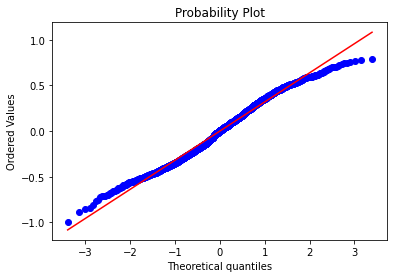

In [29]:
from scipy import stats
stats.probplot(results14.resid, dist='norm', plot=plt);

In [30]:
beta0_hat = results14.params[0]
beta1_hat = results14.params[1]
beta2_hat = results14.params[2]
beta3_hat = results14.params[3]
beta4_hat = results14.params[4]
beta5_hat = results14.params[5]

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X14, y)

p1 = regr.predict(X_test[['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram']])
p1 = np.ceil(p1)

X_test['price_range'] = abs(p1)
X_test['price_range'] = pd.DataFrame.astype(X_test['price_range'], dtype='int64')
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
405,1454,1,0.5,1,1,0,34,0.7,83,4,250,1033,3419,7,5,5,1,1,0,3
1190,1092,1,0.5,1,10,0,11,0.5,167,3,468,571,737,14,4,11,0,1,0,0
1132,1524,1,1.8,1,0,0,10,0.6,174,4,154,550,2678,16,5,13,1,0,1,2
731,1807,1,2.1,0,2,0,49,0.8,125,1,337,1384,1906,17,13,13,0,1,1,2
1754,1086,1,1.7,1,0,1,43,0.2,111,6,56,1150,3285,11,5,17,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,1861,1,0.9,0,4,1,55,0.5,148,7,1698,1877,601,7,5,4,1,0,0,1
668,1677,0,1.8,1,4,0,11,0.7,124,6,271,1477,3771,15,6,12,1,0,0,4
820,1387,0,0.5,0,0,1,61,0.5,98,3,785,1151,629,5,3,11,1,1,0,1
312,894,0,0.5,1,1,1,50,0.5,199,3,1285,1462,3615,13,0,6,1,0,1,3


### Método de Árvore de Regressão



In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
features = ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep'	,'mobile_wt','n_cores',	'px_height','px_width','ram','sc_h'	,'sc_w','talk_time','three_g','touch_screen','wifi']
X = dados.loc[:, features]
y = dados.loc[:, ['price_range']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .60)

In [33]:
arvore = DecisionTreeRegressor()
arvore.fit(X_train, y_train)

p = arvore.predict(X_test)

In [34]:
X_test['price_range'] = abs(p1)
X_test['price_range'] = pd.DataFrame.astype(X_test['price_range'], dtype='int64')
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
405,1454,1,0.5,1,1,0,34,0.7,83,4,250,1033,3419,7,5,5,1,1,0,3
1190,1092,1,0.5,1,10,0,11,0.5,167,3,468,571,737,14,4,11,0,1,0,0
1132,1524,1,1.8,1,0,0,10,0.6,174,4,154,550,2678,16,5,13,1,0,1,2
731,1807,1,2.1,0,2,0,49,0.8,125,1,337,1384,1906,17,13,13,0,1,1,2
1754,1086,1,1.7,1,0,1,43,0.2,111,6,56,1150,3285,11,5,17,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,1861,1,0.9,0,4,1,55,0.5,148,7,1698,1877,601,7,5,4,1,0,0,1
668,1677,0,1.8,1,4,0,11,0.7,124,6,271,1477,3771,15,6,12,1,0,0,4
820,1387,0,0.5,0,0,1,61,0.5,98,3,785,1151,629,5,3,11,1,1,0,1
312,894,0,0.5,1,1,1,50,0.5,199,3,1285,1462,3615,13,0,6,1,0,1,3


[Voltar para o sumário](#sumario)

___
<div id='validation'></div>

## 4. Processo e Estatísticas de validação

Calcular medidas que informam a performance de cada modelo ajustado. Para cada um:

* Dividir a base de dados em **Treinamento** e **Teste**. Usar **Treinamento** para estimar cada modelo.

* Estudar medidas que validam os modelos.

    Exemplos:

    * <a href='https://help.salesforce.com/s/articleView?id=sf.bi_edd_model_metrics_cross_validation_measure.htm&type=5'>Cross Validation Tab for Numeric Use Cases</a>

    * <a href='https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-está-funcionando-mesmo-a5892f6468b'>Como saber se seu modelo de Machine Learning está funcionando mesmo</a>

    * <a href='https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/'>Modelos Preditivos de Notas de Redação do ENEM 2015</a>

* Discutir sobre overfitting e underfitting (<a href='https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/'>link</a>)

* **Extra**: Faça o processo de Validação Cruzada utilizando também 10 ciclos e calcule a performance média e desvio padrão das duas medidas R2 e RMS tanto para a parte treinamento como para a parte teste. Discuta com riqueza de detalhes.

[Voltar para o sumário](#sumario)

___
<div id='conclusion'></div>

## 5. Conclusão

[Voltar para o sumário](#sumario)

___
<div id='ref'></div>

## 6. Referências Bibliográficas

- Banco de dados:
https://www.kaggle.com/datasets/muhammetvarl/laptop-price

[Voltar para o sumário](#sumario)